**Importing Libraries**

We start by importing the necessary libraries for data manipulation, visualization, and model building.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

**Loading the Data**

We load the train, test, and sample submission datasets.

In [3]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')


Let's take a look at the first few rows of each dataset to understand their structure.

In [4]:
train_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [5]:
test_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
1,5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,NaN,NaN,NO,27,"Data: 100 F=40MB,24H",17.0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,NaN,NaN,NO,46,IVR Echat_Daily_50F,3.0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,NaN,128.0,555.0,280.0,NaN,NaN,NO,61,All-net 500F=2000F;5d,65.0


In [6]:
train_df.shape


(400000, 19)

In [7]:
test_df.shape

(100000, 18)

In [8]:
train_df.describe()


,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


In [9]:
train_df.describe(exclude = 'number')

,user_id,REGION,TENURE,MRG,TOP_PACK
count,400000,242480,400000,400000,232671
unique,400000,14,8,1,111
top,e6464f573cdcfc8d92e3d0c3f96a0925515d9fe8,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d
freq,1,95517,379439,400000,58675


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [11]:
train_df.nunique()

user_id           400000
REGION                14
TENURE                 8
MONTANT             2421
FREQUENCE_RECH       111
REVENUE            23760
ARPU_SEGMENT       11014
FREQUENCE             91
DATA_VOLUME        22229
ON_NET              5996
ORANGE              2072
TIGO                 805
ZONE1                319
ZONE2                255
MRG                    1
REGULARITY            62
TOP_PACK             111
FREQ_TOP_PACK        170
CHURN                  2
dtype: int64

In [12]:
train_mv = train_df.isnull().sum()
test_mv=test_df.isnull().sum()
missing_df=pd.DataFrame({'train missing values':train_mv,'test missing values':test_mv})
missing_df

,train missing values,test missing values
ARPU_SEGMENT,134663,33490.0
CHURN,0,NaN
DATA_VOLUME,196854,49338.0
FREQUENCE,134663,33490.0
FREQUENCE_RECH,140277,34951.0
FREQ_TOP_PACK,167329,41703.0
MONTANT,140277,34951.0
MRG,0,0.0
ON_NET,145819,36383.0
ORANGE,166317,41200.0


In [13]:
train_df.duplicated().sum()

np.int64(0)

In [14]:
print(train_df['CHURN'].value_counts())

CHURN
0    325156
1     74844
Name: count, dtype: int64


In [15]:
train_df.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

PRE PROCESSING DATA

In [16]:
train_df.isnull().sum()/train_df.shape[0]*100

user_id            0.00000
REGION            39.38000
TENURE             0.00000
MONTANT           35.06925
FREQUENCE_RECH    35.06925
REVENUE           33.66575
ARPU_SEGMENT      33.66575
FREQUENCE         33.66575
DATA_VOLUME       49.21350
ON_NET            36.45475
ORANGE            41.57925
TIGO              59.84650
ZONE1             92.07750
ZONE2             93.62175
MRG                0.00000
REGULARITY         0.00000
TOP_PACK          41.83225
FREQ_TOP_PACK     41.83225
CHURN              0.00000
dtype: float64

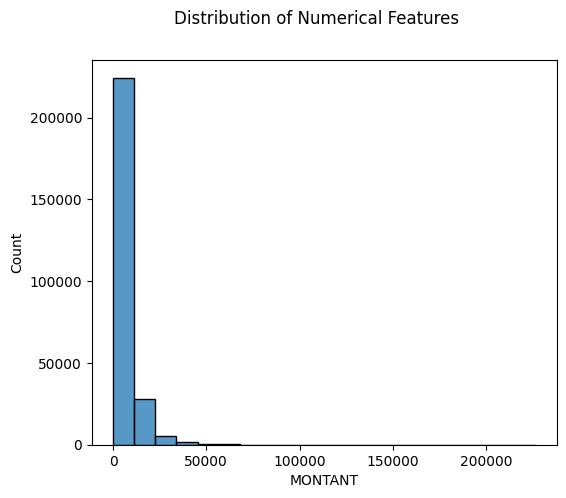

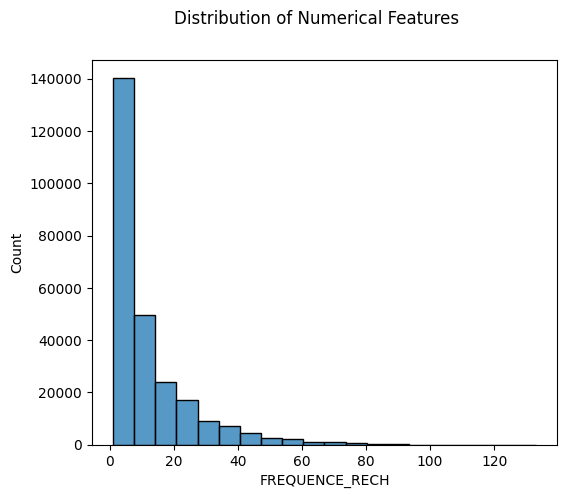

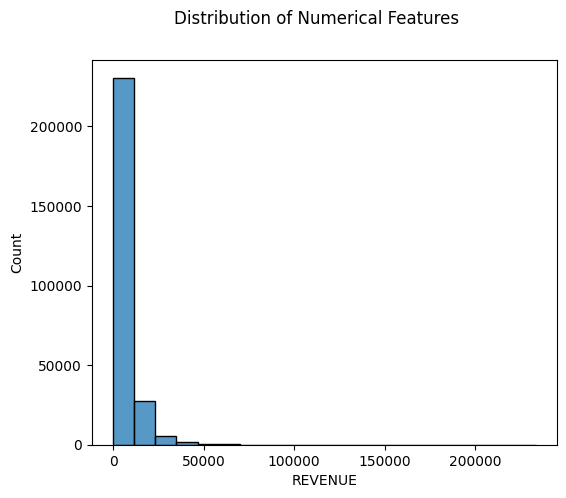

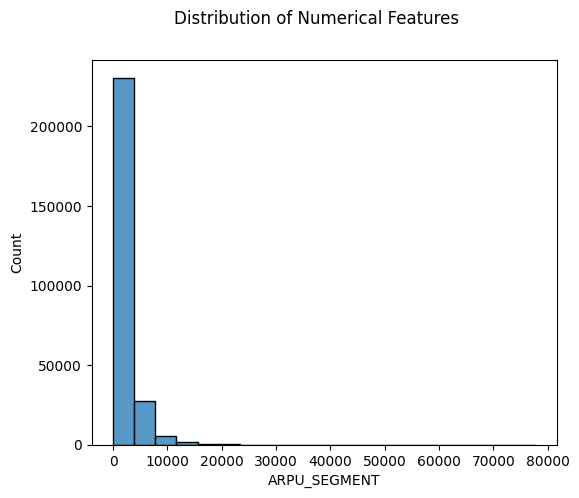

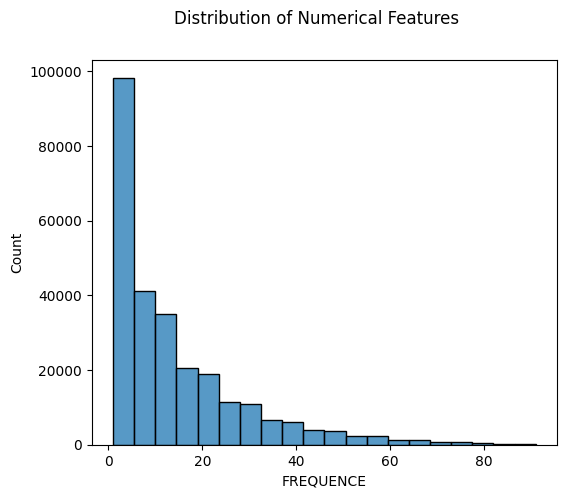

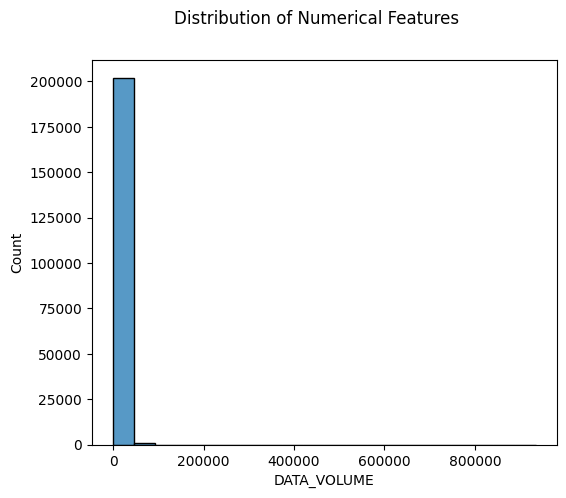

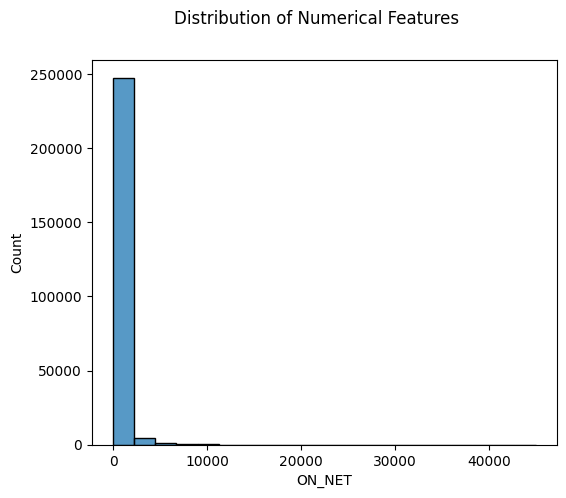

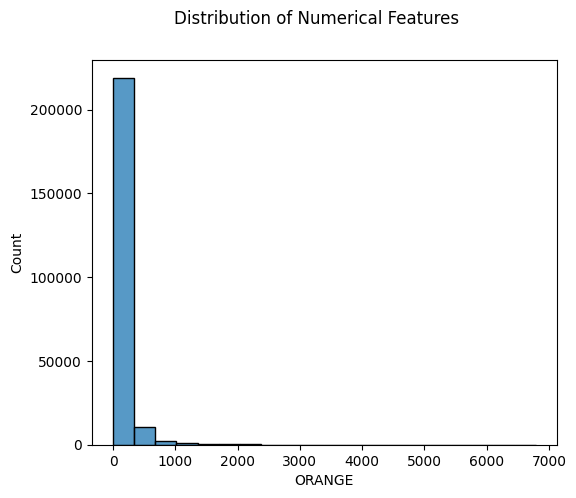

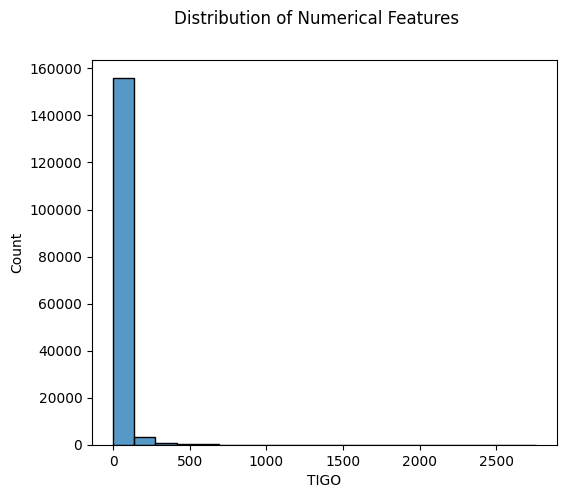

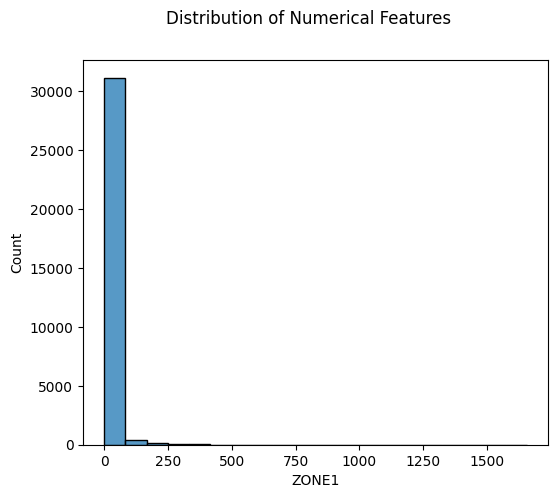

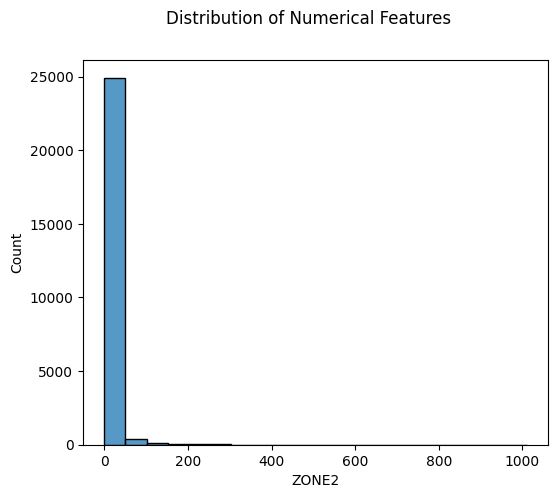

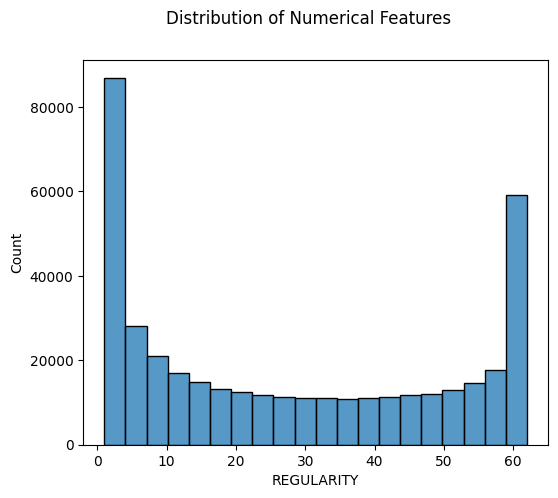

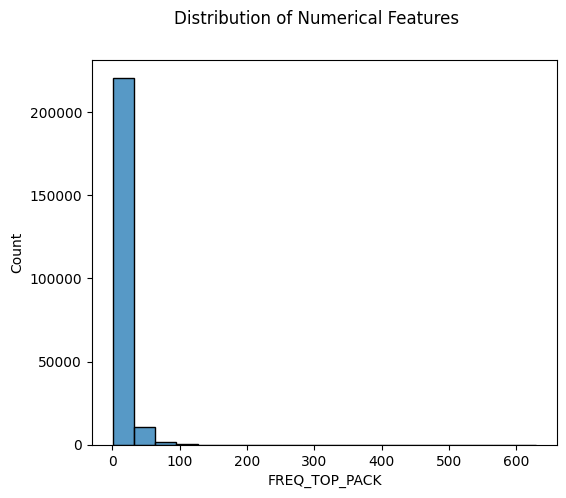

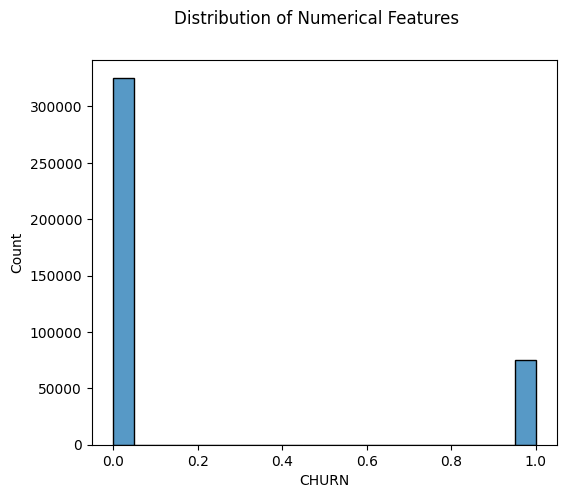

In [17]:
# Plot histograms for numerical features
for i in train_df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 5))
    sns.histplot(data=train_df,bins=20,x=i)
    plt.suptitle('Distribution of Numerical Features')
    plt.show()

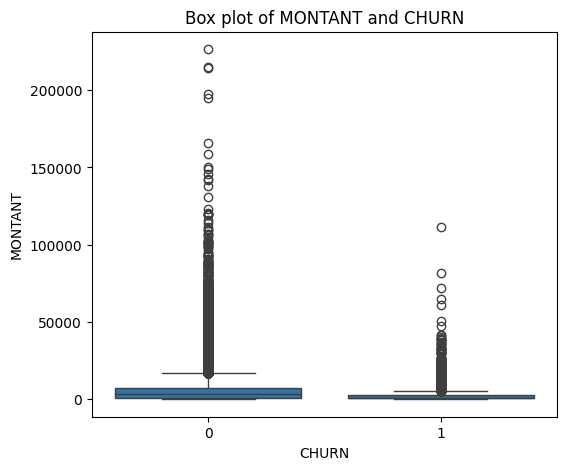

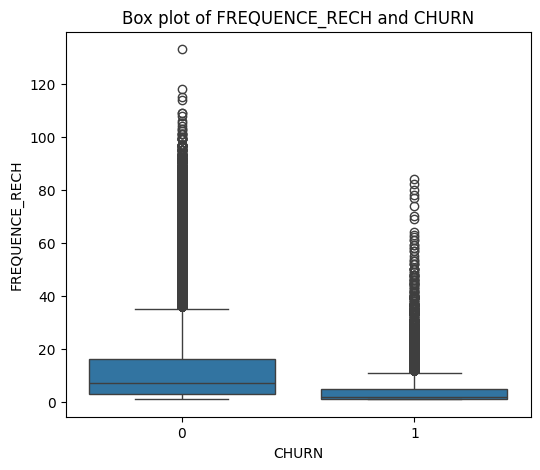

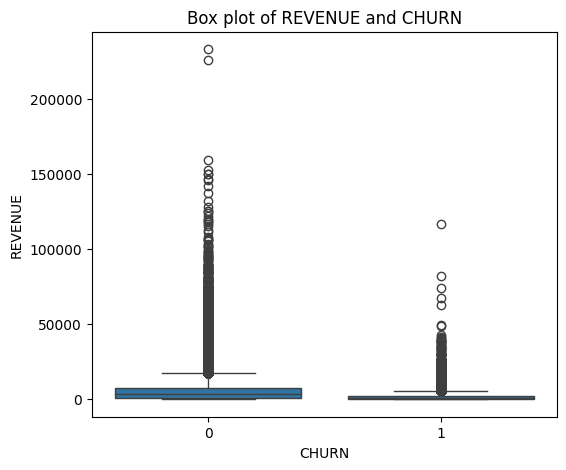

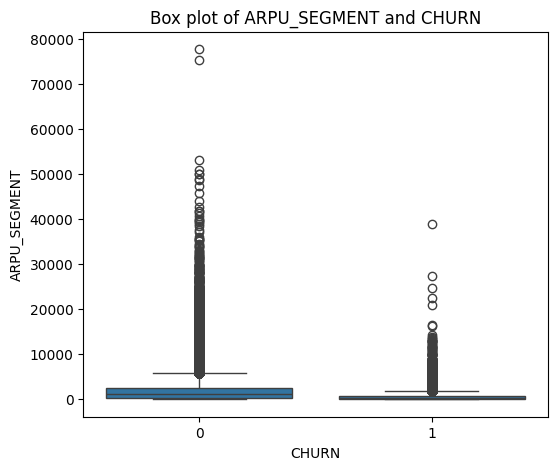

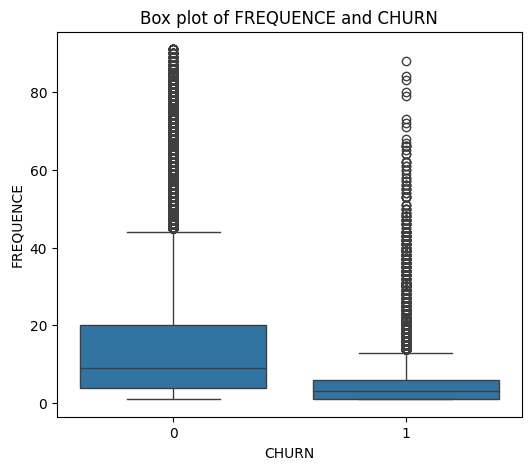

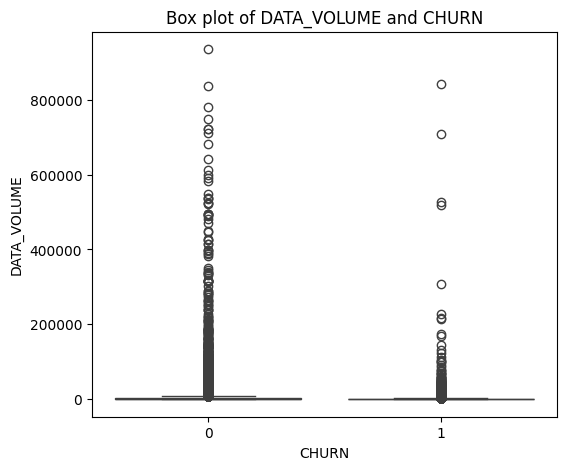

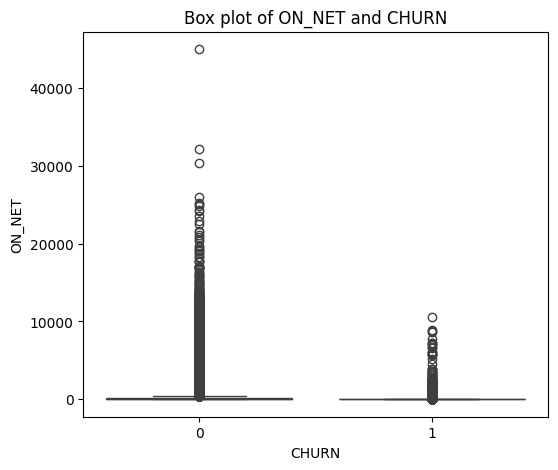

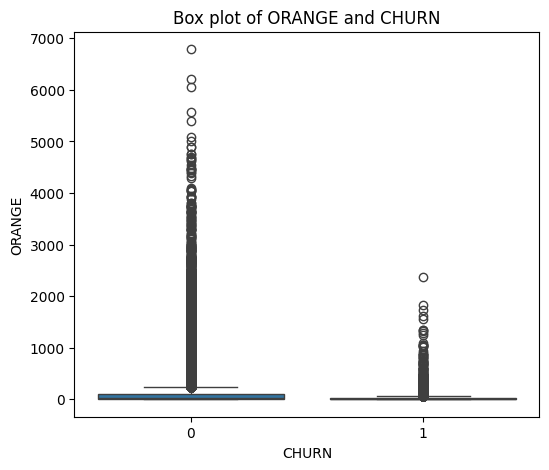

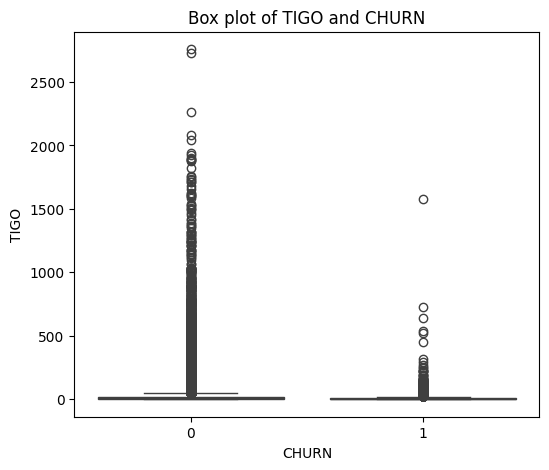

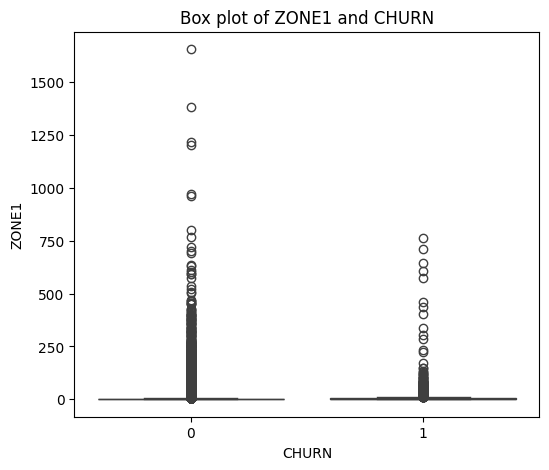

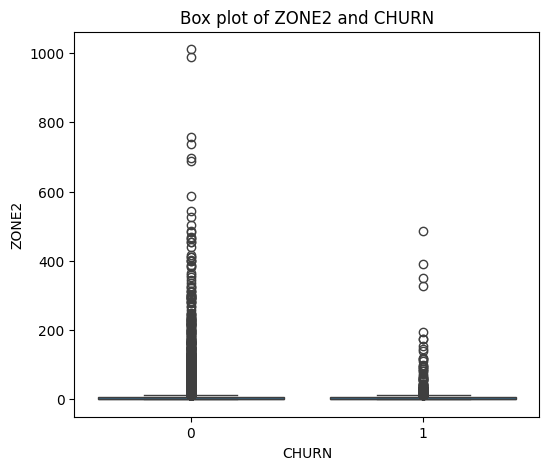

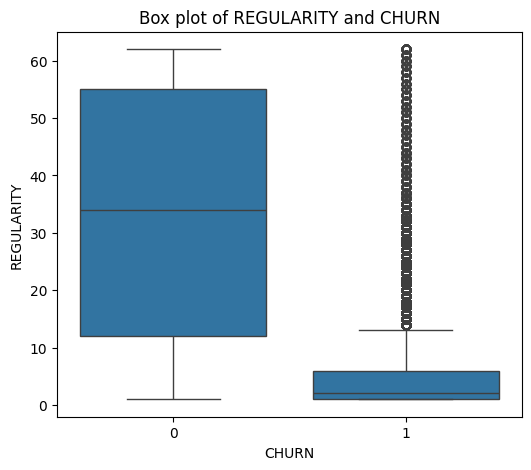

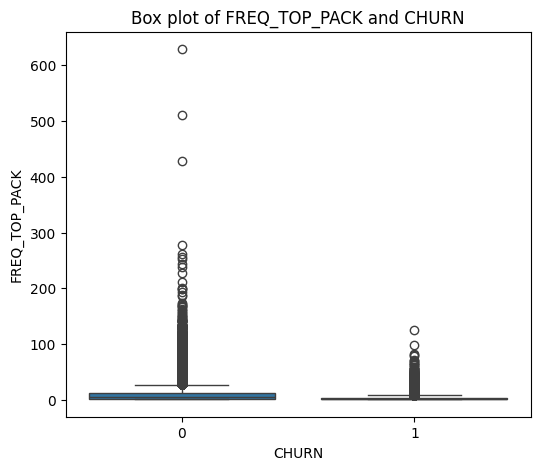

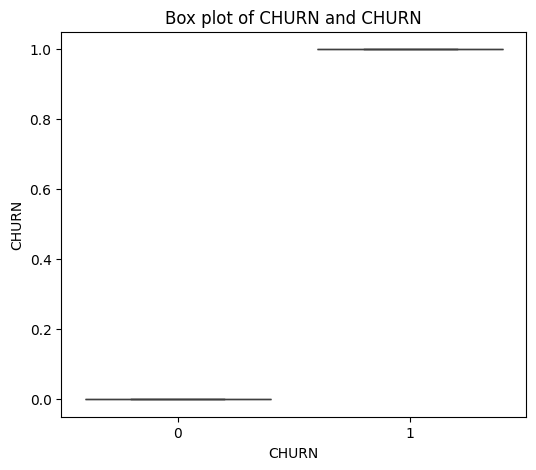

In [18]:
# Plot box plots for numerical features
for i in train_df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=train_df,y=i, x='CHURN')
    plt.title(f'Box plot of {i} and CHURN')
    plt.show()

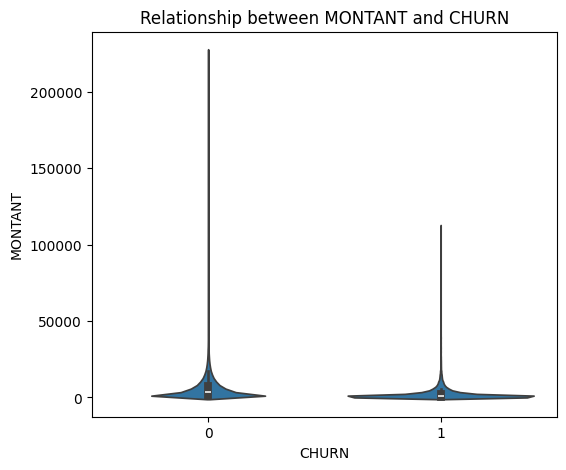

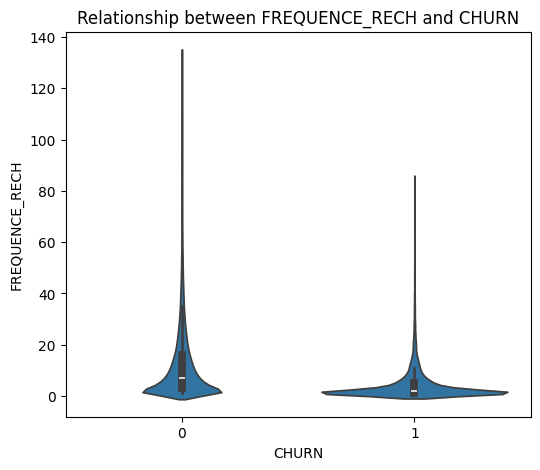

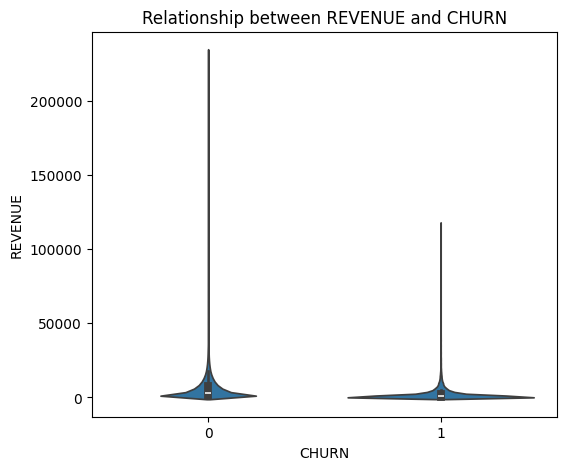

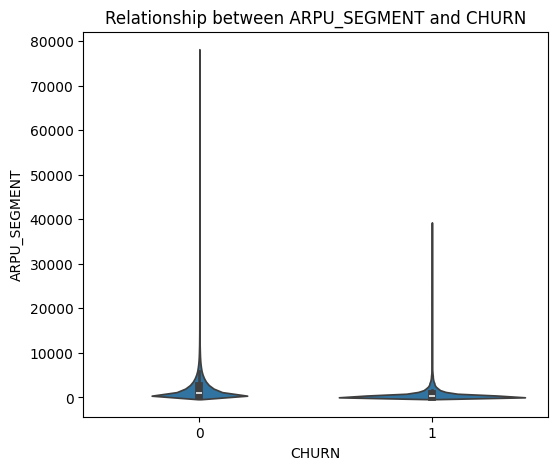

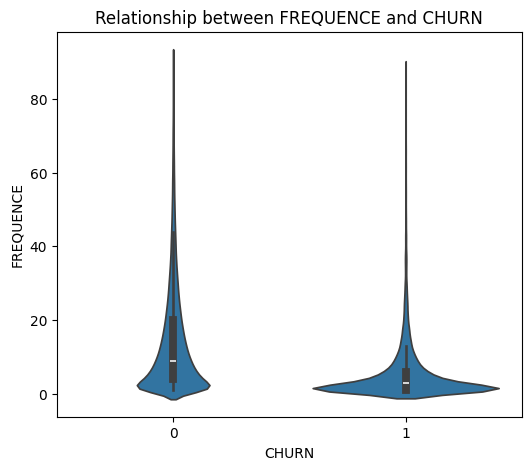

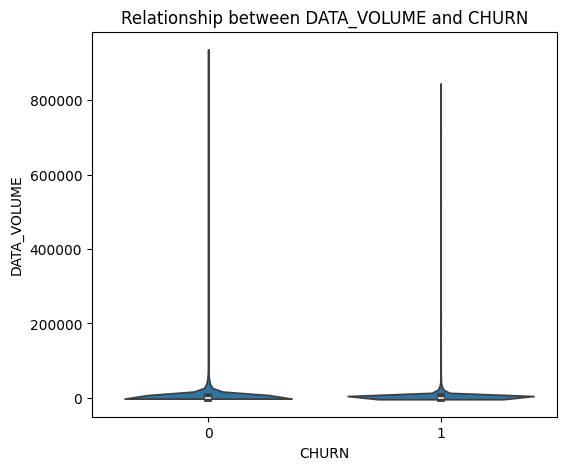

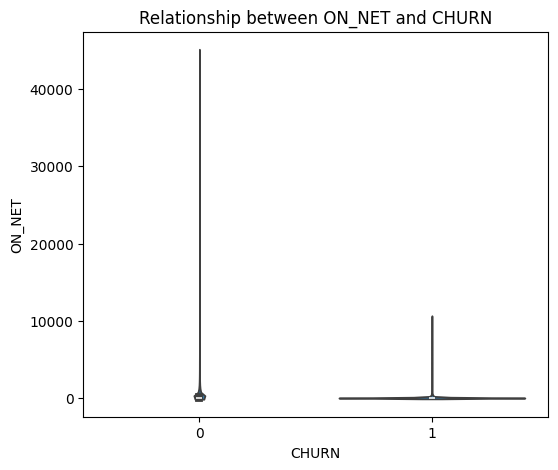

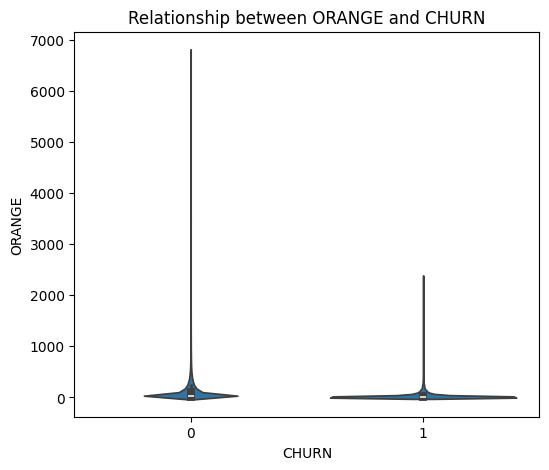

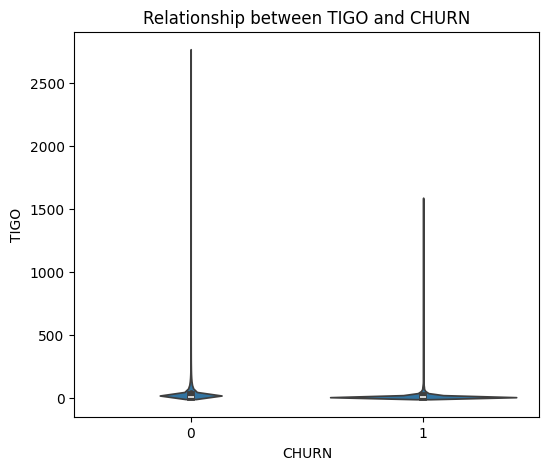

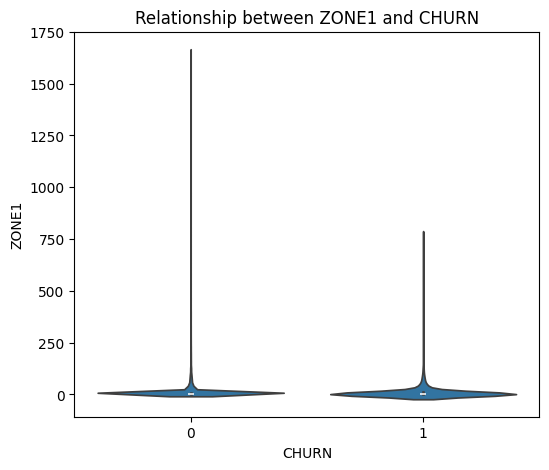

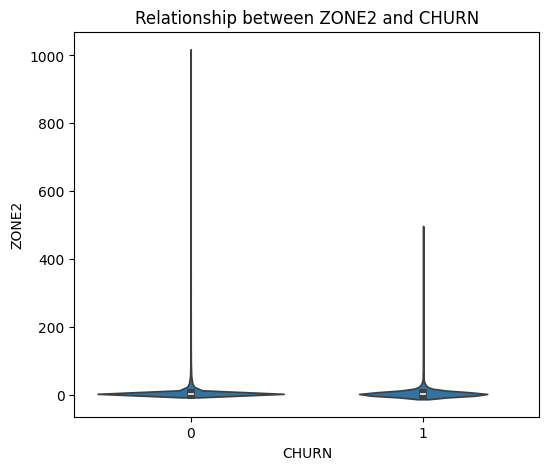

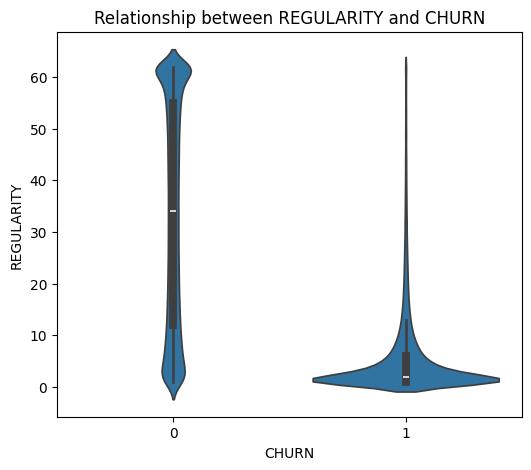

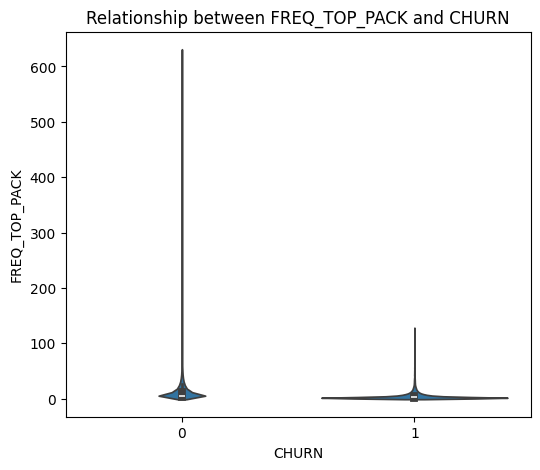

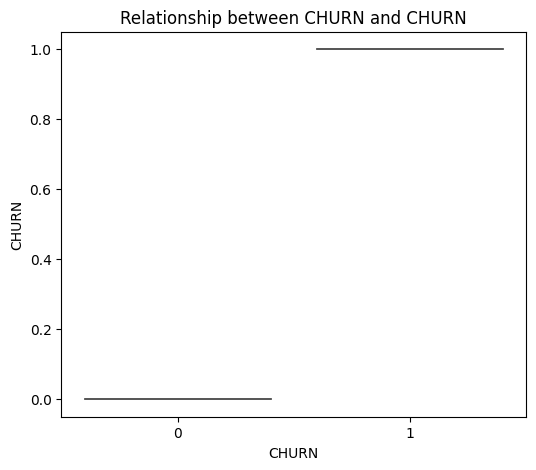

In [19]:
# Plot the relationship between numerical features and the target variable
for i in train_df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 5))
    sns.violinplot(data=train_df,y=i, x='CHURN')
    plt.title(f'Relationship between {i} and CHURN')
    plt.show()

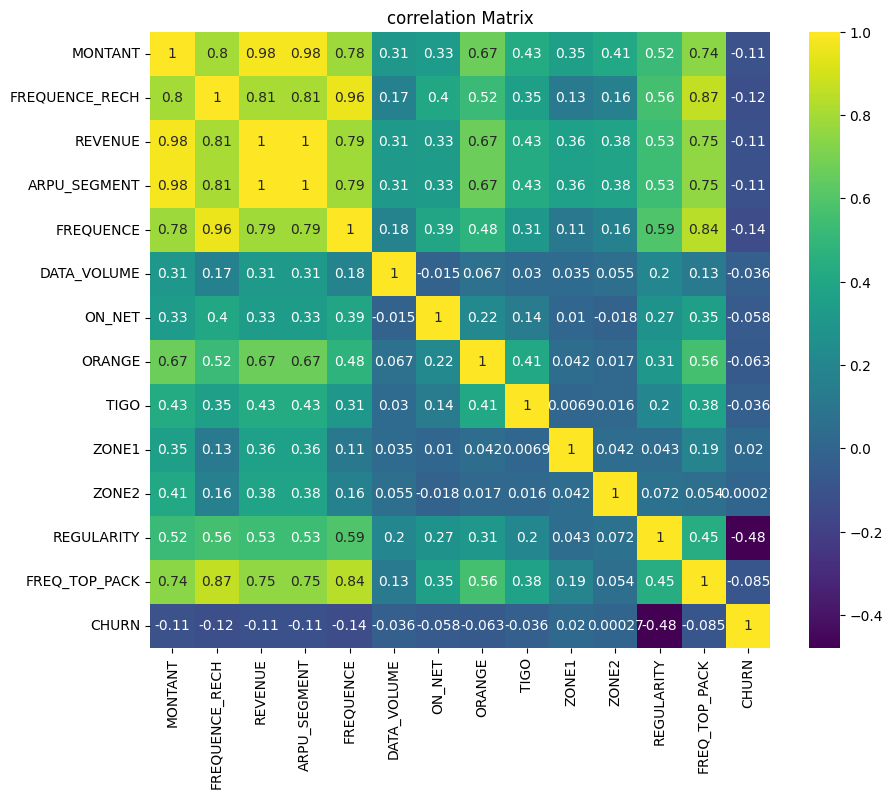

In [20]:
correlation=train_df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True,cmap='viridis')
plt.title('correlation Matrix')
plt.show()

In [21]:
correlation_with_the_target_variable=correlation['CHURN'].sort_values(ascending=False)
correlation_with_the_target_variable

CHURN             1.000000
ZONE1             0.019937
ZONE2             0.000273
TIGO             -0.035890
DATA_VOLUME      -0.036015
ON_NET           -0.057701
ORANGE           -0.063382
FREQ_TOP_PACK    -0.085136
MONTANT          -0.106229
REVENUE          -0.114822
ARPU_SEGMENT     -0.114822
FREQUENCE_RECH   -0.123113
FREQUENCE        -0.139685
REGULARITY       -0.479120
Name: CHURN, dtype: float64

**Data Preprocessing**

We need to preprocess the data before feeding it into the model.

This includes:

Handling missing values,

Encoding categorical variables, and

Feature scaling.

In [22]:
# Dropping target variable from training data
churn=train_df['CHURN']
train_df=train_df.drop('CHURN',axis=1)


In [23]:
# Combine train and test data for uniform preprocessing
expresso_df=pd.concat([train_df,test_df],sort=False)
expresso_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN


In [24]:
missing_values = expresso_df.isnull().sum()
missing_values

user_id                0
REGION            196813
TENURE                 0
MONTANT           175228
FREQUENCE_RECH    175228
REVENUE           168153
ARPU_SEGMENT      168153
FREQUENCE         168153
DATA_VOLUME       246192
ON_NET            182202
ORANGE            207517
TIGO              299174
ZONE1             460630
ZONE2             468065
MRG                    0
REGULARITY             0
TOP_PACK          209032
FREQ_TOP_PACK     209032
dtype: int64

handling missing values

In [25]:
# Calculate the percentage of missing values
missing_percentage = (missing_values / len(expresso_df)) * 100

# Combine the missing values and their percentages into a DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display the DataFrame sorted by percentage of missing values in descending order
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
missing_data

,Missing Values,Percentage
ZONE2,468065,93.6130
ZONE1,460630,92.1260
TIGO,299174,59.8348
DATA_VOLUME,246192,49.2384
FREQ_TOP_PACK,209032,41.8064
TOP_PACK,209032,41.8064
ORANGE,207517,41.5034
REGION,196813,39.3626
ON_NET,182202,36.4404
MONTANT,175228,35.0456


In [26]:
# Drop columns with too many missing values or not useful for the model
expresso_df = expresso_df.drop(['ZONE1', 'ZONE2'], axis=1)

In [27]:
# Fill missing values in numerical columns with the median
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
for i in expresso_df.select_dtypes(include=[np.number]).columns:
    expresso_df[i]=imputer.fit_transform(expresso_df[[i]])

# Fill missing values in categorical columns with "Missing_{column_name}"
imputer2=SimpleImputer(strategy='most_frequent')
for i in expresso_df.select_dtypes(include='object').columns:
    expresso_df[i]=imputer2.fit_transform(expresso_df[[i]]).ravel()

# Verify that there are no missing values left
expresso_df.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
dtype: int64

In [28]:
# View Overcorrelated columns
expresso_df[['REVENUE','ARPU_SEGMENT']]

,REVENUE,ARPU_SEGMENT
0,18000.000000,6000.000000
1,4427.000000,1476.000000
2,1500.000000,500.000000
3,2497.000000,832.000000
4,498.000000,166.000000
...,...,...
99995,20.000000,7.000000
99996,998.000000,333.000000
99997,1799.000000,600.000000
99998,2515.000000,838.000000


In [29]:
# Drop Overcorrelated columns
expresso_df = expresso_df.drop(['REVENUE'], axis=1)

In [30]:
#Drop user id as it is not usefull to train the model and MRG as it contain only one unique input
expresso_df = expresso_df.drop(['user_id','MRG'], axis=1)

In [31]:
expresso_df.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,SAINT-LOUIS,K > 24 month,17000.000000,32.000000,6000.0,34.0,3367.3012,97.0,355.0,6.000000,62.0,All-net 500F=2000F;5d,35.000000
1,DAKAR,K > 24 month,4300.000000,29.000000,1476.0,37.0,1764.0000,8.0,3.0,0.000000,40.0,"Data: 100 F=40MB,24H",22.000000
2,TAMBACOUNDA,K > 24 month,1500.000000,3.000000,500.0,3.0,3367.3012,30.0,30.0,23.199621,32.0,All-net 500F=2000F;5d,3.000000
3,FATICK,K > 24 month,1500.000000,3.000000,832.0,4.0,0.0000,159.0,45.0,19.000000,18.0,On net 200F=Unlimited _call24H,3.000000
4,FATICK,K > 24 month,5527.506398,11.512008,166.0,3.0,1.0000,1.0,3.0,23.199621,50.0,All-net 500F=2000F;5d,9.258582


handling categorical columns

In [32]:
# Encode categorical variables
expresso_df = pd.get_dummies(expresso_df, columns=['REGION', 'TOP_PACK', 'TENURE'], drop_first=True)
    


In [33]:
expresso_df.head()

,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,...,TOP_PACK_pack_chinguitel_24h,TOP_PACK_pilot_offer5,TOP_PACK_pilot_offer6,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,17000.000000,32.000000,6000.0,34.0,3367.3012,97.0,355.0,6.000000,62.0,35.000000,...,False,False,False,False,False,False,False,False,False,True
1,4300.000000,29.000000,1476.0,37.0,1764.0000,8.0,3.0,0.000000,40.0,22.000000,...,False,False,False,False,False,False,False,False,False,True
2,1500.000000,3.000000,500.0,3.0,3367.3012,30.0,30.0,23.199621,32.0,3.000000,...,False,False,False,False,False,False,False,False,False,True
3,1500.000000,3.000000,832.0,4.0,0.0000,159.0,45.0,19.000000,18.0,3.000000,...,False,False,False,False,False,False,False,False,False,True
4,5527.506398,11.512008,166.0,3.0,1.0000,1.0,3.0,23.199621,50.0,9.258582,...,False,False,False,False,False,False,False,False,False,True


In [34]:
# Split the combined data back into train and test sets
train = expresso_df.iloc[:len(churn), :]
test = expresso_df.iloc[len(churn):, :]

**Model Building**

We will use the Naive Baye's for this binary classification task.

In [35]:
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()


prediction using *Logistic Regression*

In [36]:
# Initializing and training the logistic regression

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(train, churn, test_size=0.2, random_state=42)

# # Create and train the model
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Make predictions
# y_predict = model.predict(X_test)


In [52]:
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(train, churn, test_size=0.2, random_state=42)

# # Create and train the GaussianNB model
# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()
# model.fit(X_train, y_train)

# # Make predictions
# y_predict = model.predict(X_test)


In [1]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train, churn, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_predict = model.predict(X_test)


NameError: name 'train_test_split' is not defined

In [59]:
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.8455625

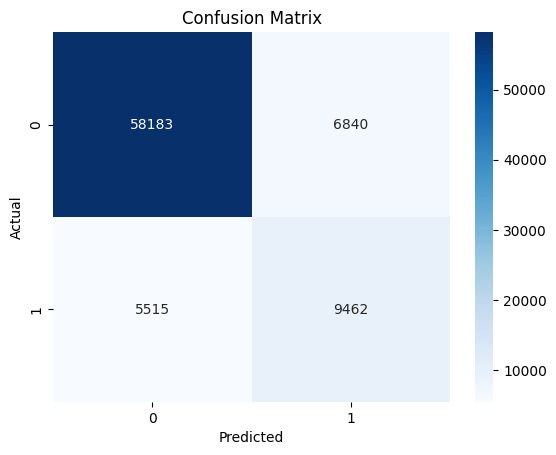

In [60]:
# Confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [61]:
# Assuming sample_sub is a DataFrame
sample_sub = pd.read_csv('sample_submission.csv')

In [6]:
# Get predictions from the Logistic Regression model
predictions = model.predict_proba(test)[:, 1]

# Create a copy of the sample submission file
baseline_sub = sample_sub.copy()

# Add the predicted probabilities to the submission file
baseline_sub['CHURN'] = predictions

# Save the submission file to a CSV
baseline_sub.to_csv('expresso_submission3.csv', index=False)

# Display the first few rows of the submission file
baseline_sub.head()




NameError: name 'model' is not defined